<a href="https://colab.research.google.com/github/JalesBussinguer/Remote_Sensing_Studies/blob/master/Desafio_Worcap_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://static.wixstatic.com/media/09958c_cebd579d09884269878a3634644c00a9~mv2.png"></p>

<p align="center"><img src="https://static.wixstatic.com/media/09958c_c1a4cb025a914c62b0bca050fcdfc671~mv2.png"></p>

A ideia desse projeto nasceu da minha participação no hackathon do WorCAP 2020, juntamente com outros dois colegas.

Embora não tenhamos obtido um resultado satisfatório no evento, decidi revisitar o desafio e propor a minha solução, como forma de praticar a programação e aprofundar meus conhecimentos em *machine learning*.

Todos os detalhes do desafio, do conjunto de dados e da construção do modelo estão contidos em meu site, neste link.

## O Desafio

O desafio apresentado durante o hackaton do WorCAP 2020 na plataforma Kaggle baseia-se no artigo "***Using geographically weighted variables for image classification***", publicado por **Johnson, Tateishi & Xie (2012)**.

Este consiste basicamente em uma classificação multiclasse, onde algoritmos de aprendizado de máquina devem ser utilizados para classificar amostras de pixels derivados de imagens de satélite e interpolação espacial.

O modelo deve apresentar a maior acurácia possível, isto é, a porcentagem de acertos que o modelo de classificação é capaz de predizer.

## Objetivos do projeto

*   **Objetivo geral**: Construir um modelo de aprendizado de máquina capaz de retornar uma acurácia superior ao do estudo original (85,9%) na classificação dos dados, sem a ocorrência de superadequação (*overfitting*);

*   **Objetivos específicos**:

  *   Praticar e aprofundar os conceitos e ferramentas de aprendizado de máquina;
  *   Praticar a programação em Python.

## Índice

1.   Importações
  
  1.1. Importação das bibliotecas
  
  1.2. Importação dos dados

  1.3. Dicionário das variáveis preditoras (atributos)

  1.4. Dicionário das variáveis-alvo (rótulos)

2.   Verificação dos conjuntos de dados
  
  2.1. Conferindo se há falta de dados

  2.2. Conferindo os tipos de dados

  2.3. Verificando o balanceamento das classes

3. Construção do modelo

  3.1. Preparação dos dados

  3.2. Modelo-padrão (*Random Forest Classifier - default*)

  3.3. Otimização dos hiperparâmetros (*Grid Search*)

  3.4. Performance dos modelos candidatos com o conjunto de dados de teste

4. Conclusões

---

# 1. Importações

## 1.1. Importação das bibliotecas

In [50]:
# Importação das bibliotecas básicas
import pandas as pd
import numpy as np

# Importação das bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.model_selection import ValidationCurve, LearningCurve

# Importação das bibliotecas e módulos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV

# Suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1.2. Importação dos dados

In [3]:
# Importando os dados de treinamento

dados_treino = pd.read_csv("https://raw.githubusercontent.com/JalesBussinguer/Remote_Sensing_Studies/master/data/worcap_2020/dados_treino.csv")

dados_treino.head()

,id,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,label
0,454,54,28,51,93,56,100,80,24,55,64.88,26.03,50.29,6.74,-30.83,-39.83,0.47,5.50,0.47,-24.52,-0.83,-3.99,-23.22,-0.94,-4.30,-23.22,-1.69,-4.55,s
1,457,54,29,51,88,51,91,95,24,55,56.28,20.62,42.67,10.16,-26.12,-32.05,-21.37,5.39,-0.30,-19.03,-0.54,-4.09,-22.24,-1.01,-4.93,-17.81,-0.53,-2.98,s
2,261,59,30,52,90,54,93,80,26,58,56.58,21.37,45.45,12.77,-28.17,-30.94,-1.30,3.64,-2.27,-21.04,-1.86,-5.61,-27.73,-1.15,-5.74,-21.81,-2.39,-5.07,s
3,8,53,27,49,95,49,92,63,25,54,66.97,24.43,49.28,8.08,-22.53,-28.25,19.78,3.75,0.92,-25.65,-2.09,-5.95,-39.27,-2.13,-8.73,-30.73,-2.42,-5.58,s
4,478,58,40,65,100,58,100,106,26,57,51.79,8.74,28.06,-1.00,-33.12,-41.04,-32.17,3.48,-2.08,-18.31,-0.20,-4.85,-21.15,-1.00,-4.84,-17.00,-0.91,-3.38,d


In [4]:
# Importação dos dados de teste

dados_teste = pd.read_csv("https://raw.githubusercontent.com/JalesBussinguer/Remote_Sensing_Studies/master/data/worcap_2020/dados_teste.csv")

dados_teste.head() # Visualizando as 5 primeiras linhas do conjunto

,id,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,356,79,28,54,117,52,99,93,25,60,34.87,24.16,45.04,-23.75,-26.66,-38.87,-18.61,4.12,-5.03,-18.51,-1.36,-4.23,-18.09,-0.70,-3.27,-15.79,-1.21,-3.39
1,202,46,27,50,83,51,90,76,26,56,68.54,24.27,48.21,16.37,-24.89,-27.66,2.19,4.93,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32
2,183,56,26,50,94,50,87,83,24,54,53.57,21.97,43.47,2.00,-25.22,-27.11,-8.04,5.69,1.43,-12.99,0.23,-5.97,-14.35,-0.55,-5.40,-14.51,-2.68,-5.15
3,306,56,58,81,69,65,100,109,42,80,56.41,-8.84,11.55,26.51,-40.14,-41.28,-32.79,-11.96,-24.36,-19.27,-0.81,-4.45,-18.37,-0.94,-4.23,-16.77,-1.35,-3.65
4,511,70,28,53,103,53,99,94,24,61,46.95,24.05,45.32,0.11,-28.10,-39.45,-14.22,5.33,-5.90,-23.26,-0.43,-4.16,-28.30,-1.13,-4.92,-23.06,-1.53,-4.15


In [5]:
# Importação dos dados de validação do modelo

dados_validacao = pd.read_csv("https://raw.githubusercontent.com/JalesBussinguer/Remote_Sensing_Studies/master/data/worcap_2020/dados_validacao.csv")

gt = dados_validacao['label'].values
gt

array(['h ', 's ', 's ', 'o ', 'h ', 'd ', 'h ', 's ', 'h ', 'o ', 'd ',
       's ', 's ', 'd ', 'd ', 'o ', 's ', 'h ', 'o ', 's ', 'o ', 'd ',
       's ', 's ', 's ', 'd ', 'o ', 's ', 'd ', 's ', 'd ', 's ', 'd ',
       'o ', 'h ', 'h ', 's ', 'd ', 'd ', 'o ', 'h ', 's ', 'd ', 's ',
       'h ', 'o ', 's ', 'o ', 'o ', 'd ', 's ', 'd ', 'h ', 'h ', 'h ',
       's ', 'd ', 'd ', 's ', 'd ', 's ', 'h ', 's ', 's ', 'o ', 's ',
       'd ', 'h ', 's ', 's ', 'o ', 'h ', 'd ', 'd ', 'd ', 'h ', 'd ',
       'h ', 's ', 'h ', 'o ', 's ', 's ', 'h ', 'o ', 's ', 'd ', 'd ',
       'd ', 's ', 'h ', 'd ', 's ', 's ', 's ', 'h ', 'd ', 'd ', 'o ',
       'h ', 'd ', 'd ', 'h ', 's ', 'h ', 's ', 's ', 's ', 's ', 'd ',
       's ', 'o ', 'o ', 's ', 'd ', 'd ', 'o ', 's ', 'd ', 'h ', 'd ',
       's ', 's ', 's ', 'd ', 'o ', 'h ', 'h ', 's ', 's ', 'd ', 'h ',
       's ', 's ', 'd ', 'h ', 'h ', 'd ', 's ', 's ', 'd ', 's ', 'd ',
       'd ', 's ', 'o ', 'd ', 's ', 'd ', 'd ', 's

## 1.3. Dicionário das variáveis preditoras (atributos):

* `id`: Identificação única da linha, alusiva a um pixel único das imagens;
* `b1`: Banda do verde corresponde ao mês de setembro de 2010;
* `b2`: Banda do vermelho corresponde ao mês de setembro de 2010;
* `b3`: Banda do infravermelho próximo corresponde ao mês de setembro de 2010;
* `b4`: Banda do verde corresponde ao mês de Março de 2011;
* `b5`: Banda do vermelho corresponde ao mês de Março de 2011;
* `b6`: Banda do infravermelho próximo corresponde ao mês de Março de 2011;
* `b7`: Banda do verde corresponde ao mês de Maio de 2011;
* `b8`: Banda do vermelho corresponde ao mês de Maio de 2011;
* `b9`: Banda do infravermelho próximo corresponde ao mês de Maio de 2011;
* `pred_minus_obs_S_b1` até `pred_minus_obs_S_b9`: Valores espectrais previstos (Com base na interpolação espacial) subtraídos dos valores espectrais reais para a classe "s";
* `pred_minus_obs_H_b1` até `pred_minus_obs_H_b9`: Valores espectrais previstos (Com base na interpolação espacial) subtraídos dos valores espectrais reais para a classe "h".



## 1.4. Dicionário das variáveis-alvo (rótulos):

* `S` = *Sugi* (Floresta composta predominantemente pela espécie [*Cryptomeria japonica*](https://pt.wikipedia.org/wiki/Cryptomeria_japonica))
* `H` = *Hinoki* (Floresta composta predominantemente pela espécie [*Chamaecyparis obtusa*](https://en.wikipedia.org/wiki/Chamaecyparis_obtusa))
* `D` = *Mixed Deciduous* (Formação florestal composta por diversas espécies deciduais ou caducifólias, incluindo Sugi e Hinoki);
* `O` = *Other* (Feição não-florestal)

# 2. Verificação dos conjuntos de dados

Nessa primeira fase, é interessante verificar a integridade dos conjuntos de dados para certificar que não há dados faltando ou dados que estão em um formato inadequado para uso em um algoritmo de aprendizado de máquina.

## 2.1. Conferindo se existem dados faltando

Para a conferência dos dados, será utilizada uma expressão que faz a contagem de dados que faltam para cada coluna e divide pelo tamanho do conjunto, retornando a porcentagem faltante para cada atributo.

Por fim, será avaliada a média de todos os atributos retornando uma porcentagem global de dados faltantes nos conjuntos.

In [6]:
# Verificação dos dados de treino

vdtreino = dados_treino.isnull().sum()/dados_treino.shape[0]

if vdtreino.mean() == 0:
  print('Não há dados faltando no conjunto de treino')
else:
  print(f'A proporção de dados faltando no conjunto de treino é {vdtreino.mean()} %')

Não há dados faltando no conjunto de treino


In [7]:
# Verificação dos dados de teste

vdteste = dados_teste.isnull().sum()/dados_teste.shape[0]

if vdteste.mean() == 0:
  print('Não há dados faltando no conjunto de teste')
else:
  print(f'A proporção de dados faltando no conjunto de teste é {vdteste.mean()} %')

Não há dados faltando no conjunto de teste


In [8]:
# Verificação dos dados de validação

vdvalidacao = dados_validacao['label'].isnull().sum()/dados_validacao['label'].shape[0]

if vdvalidacao.mean() == 0:
  print('Não há dados faltando no conjunto de validação')
else:
  print(f'A proporção de dados faltando no conjunto de validação é {vdvalidacao.mean()} %')

Não há dados faltando no conjunto de validação


De acordo com os relatórios acima, observa-se que não há dados faltando nos conjuntos. Com isso, podemos passar para a verificação dos tipos de dados.

## 2.2. Conferindo os tipos de dados

In [9]:
# Verificação dos tipos de dados no conjunto de dados de treino

dados_treino.dtypes

id                       int64
b1                       int64
b2                       int64
b3                       int64
b4                       int64
b5                       int64
b6                       int64
b7                       int64
b8                       int64
b9                       int64
pred_minus_obs_H_b1    float64
pred_minus_obs_H_b2    float64
pred_minus_obs_H_b3    float64
pred_minus_obs_H_b4    float64
pred_minus_obs_H_b5    float64
pred_minus_obs_H_b6    float64
pred_minus_obs_H_b7    float64
pred_minus_obs_H_b8    float64
pred_minus_obs_H_b9    float64
pred_minus_obs_S_b1    float64
pred_minus_obs_S_b2    float64
pred_minus_obs_S_b3    float64
pred_minus_obs_S_b4    float64
pred_minus_obs_S_b5    float64
pred_minus_obs_S_b6    float64
pred_minus_obs_S_b7    float64
pred_minus_obs_S_b8    float64
pred_minus_obs_S_b9    float64
label                   object
dtype: object

In [10]:
# Verificação dos tipos de dados no conjunto de dados de teste

dados_teste.dtypes

id                       int64
b1                       int64
b2                       int64
b3                       int64
b4                       int64
b5                       int64
b6                       int64
b7                       int64
b8                       int64
b9                       int64
pred_minus_obs_H_b1    float64
pred_minus_obs_H_b2    float64
pred_minus_obs_H_b3    float64
pred_minus_obs_H_b4    float64
pred_minus_obs_H_b5    float64
pred_minus_obs_H_b6    float64
pred_minus_obs_H_b7    float64
pred_minus_obs_H_b8    float64
pred_minus_obs_H_b9    float64
pred_minus_obs_S_b1    float64
pred_minus_obs_S_b2    float64
pred_minus_obs_S_b3    float64
pred_minus_obs_S_b4    float64
pred_minus_obs_S_b5    float64
pred_minus_obs_S_b6    float64
pred_minus_obs_S_b7    float64
pred_minus_obs_S_b8    float64
pred_minus_obs_S_b9    float64
dtype: object

In [11]:
# Verificação dos tipos de dados no conjunto de dados de validação

pd.DataFrame(gt).dtypes

0    object
dtype: object

Observa-se que nos conjuntos de dados existem três tipos de dados distintos:
* Inteiros (int64): são os dados que representam os números digitais expressos nos pixels das imagens, e são diretamente relacionados à resposta espectral dos alvos da cena. Na coluna `id`, representam a identificação única da amostra de pixel.
* Flutuantes (float64): são dados que representam o resultado de uma estatística que mede a diferença entre uma resposta espectral modelada e a resposta espectral observada;
* Texto (object): são os dados de rótulos dos pixel.

Em todos os conjuntos avaliados, os tipos de dados são compatíveis com o seu significado.

## 2.3. Verificação do balanceamento das classes

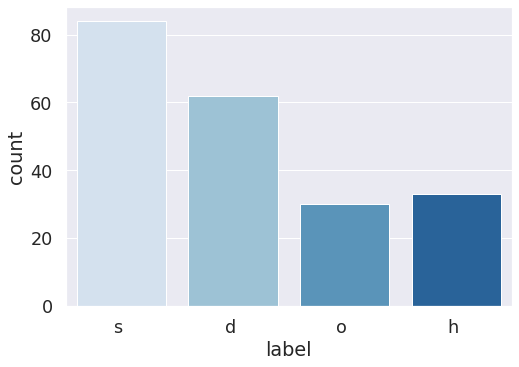

In [58]:
# plotagem balanceamento das classes do conjunto de treino
data_treino = dados_treino['label']
sns.countplot(data_treino, palette="Blues")
plt.show()

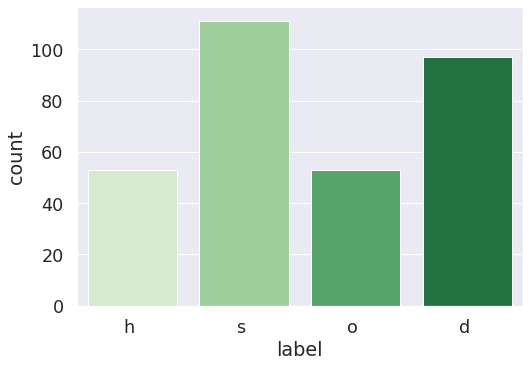

In [60]:
# plotagem do balanceamento das classes do conjunto de validação
data_validacao = dados_validacao
sns.countplot(data_validacao.label, palette="Greens")
plt.show()

Observando-se os gráficos acima, percebe-se um claro desbalanceamento das classes, tanto no conjunto de treino quanto no conjunto de validação.

Especula-se de que o desbalanceamento das classes seja em função da proporção em área das classes na cena. Por ser tratar de uma região predominantemente florestal e o método de amostragem ser aleatório, tal condição é estatisticamente justificada.

Para lidar com esse cenário, me voltei à literatura. O capítulo 09 do livro **Machine Learning: Guia de Referência Rápida** apresenta diversos métodos para lidar com classes desbalanceadas. O método escolhido foi a utilização de algoritmos de classificação baseados em árvores e ensembles.

Dessa forma, foi escolhido o algoritmo ***Random Forest Classifier*** como modelo-base para a solução do desafio. A escolha foi reforçada pelo fato desse algoritmo utilizar *bagging* para corrigir a tendência das árvores de decisão à superadequação (*overfitting*).

# 3. Construção do modelo:

## 3.1. Preparação dos dados:

In [16]:
# Remoção da coluna de identificação do conjunto de dados de treino

dados = dados_treino.drop(columns="id")

# Separação dos atributos e dos rótulos para os dados de treinamento

X = dados.iloc[:,:-1].values # atributos (amostras de pixels)
y = dados.iloc[:,-1].values # rótulos das classes

In [17]:
# Remoção da coluna de identificação do conjunto de dados de teste

X_teste = dados_teste.drop(columns="id").values

In [18]:
# Resumo dos conjuntos de dados

print(f"Formato dos dados de treino: X ({X.shape[0]} linhas e {X.shape[1]} colunas) , y ({y.shape[0]} linhas)")
print()
print(f"Formato dos dados de teste: {X_teste.shape[0]} linhas e {X_teste.shape[1]} colunas")
print(f"Formato dos dados de validação: {gt.shape[0]} linhas")
print()
print(f"Número de classes: {len(set(dados['label'].values))}")
print(f"Número de atributos: {X.shape[1]}")

Formato dos dados de treino: X (209 linhas e 27 colunas) , y (209 linhas)

Formato dos dados de teste: 314 linhas e 27 colunas
Formato dos dados de validação: 314 linhas

Número de classes: 4
Número de atributos: 27


Um indicativo de que tudo está em conformidade é a compatibilidade do número de linhas entre atributos e rótulos. 

Além disso, Para o conjunto de teste, o indicativo de que está tudo certo é a quantidade de colunas (features), que bate com a quantidade de features do conjunto de treino.

Com isso, temos tudo pronto para começar a trabalhar no modelo de aprendizado de máquina.

## 3.2. Modelo-padrão (Random Forest Classifier - default)

Para chegar ao modelo final, o primeiro passo será estabelecer uma linha de base por meio de um modelo padrão, isto é, um resultado de referência que servirá de parâmetro para avaliarmos o quanto conseguimos melhorar nosso modelo.

In [51]:
# Instanciando o modelo-padrão

rf_default = RandomForestClassifier(random_state=42)

In [52]:
# Treinamento do modelo

rf_default.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
# Predição com o conjunto de dados de teste

y_pred_default = rf_default.predict(X_teste)
print("A acurácia do modelo default é:", round(accuracy_score(gt, y_pred_default), 3) * 100, "%")
print("O índice kappa do modelo default é:", round(cohen_kappa_score(gt, y_pred_default), 3))

A acurácia do modelo default é: 89.5 %
O índice kappa do modelo default é: 0.854


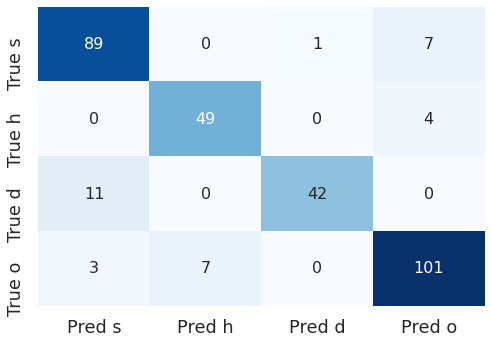

In [57]:
# Matriz de confusão do modelo-padrão

cm_default = pd.DataFrame(confusion_matrix(gt, y_pred_default), columns=['Pred s', 'Pred h', 'Pred d', 'Pred o'], 
             index=['True s', 'True h', 'True d', 'True o'])

sns.set(font_scale=1.6)

sns.heatmap(cm_default, annot=True, fmt='', annot_kws={'fontsize': 16}, cmap='Blues', cbar=False)

Nossa linha de base é uma acurácia de 89,5%. Com isso, faremos uma otimização desse modelo de modo a obter uma acurácia maior que esse valor.

## 3.3. Otimização dos hiperparâmetros do modelo por busca em grade (*Grid Search*)

Em geral, o seed aleatório não é utilizado na otimização do modelo, uma vez que este é um hiperparâmetro utilizado para garantir que os mesmos resultados serão retornados toda vez que executar o código. 

A grande maioria de exemplos e projetos que tive contato utilizam o famoso número 42 como seed a fim de eliminar a aleatoriedade dos resultados e possibilitar a comparação com outros modelos. 

Contudo, após a leitura de um artigo que utiliza o número diferente como seed, fiquei curioso se a mudança do valor desse hiperparâmetro exerceria  algum tipo de influência nos resultados do modelo e decidi fazer uma verificação.

Para entender melhor essa questão, vamos plotar uma curva de validação a fim de avaliar como o desempenho do modelo-padrão responde a mudanças no valor desse hiperparâmetro.

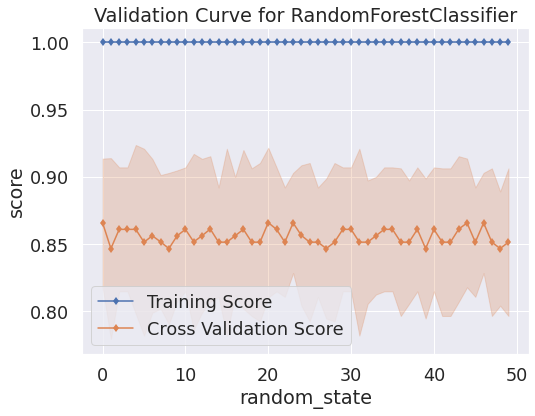

In [56]:
 # Curva de validação para verificar a sensibilidade do modelo-padrão ao hiperparâmetro 'random_state'
 
 fig, ax = plt.subplots(figsize=(8,6))
 vc_viz = ValidationCurve(rf_default, param_name='random_state', param_range=np.arange(0, 50), cv=KFold(n_splits=10), scoring='accuracy', n_jobs=-1)
 vc_viz.fit(X, y)
 vc_viz.poof()

As pontuações apresentadas pela curva "Cross Validation Score" explicitam como o modelo responderia a dados não vistos anteriormente, nos permitindo inferir que o modelo é sensível a esse hiperparâmetro.

Os valores que retornaram as melhores pontuações nessa curva serão utilizados para a otimização do modelo default.

Para a otimização (tuning) do modelo padrão, estabeleci uma busca em grade com alguns hiperparâmetros, sempre buscando o equilíbrio entre o espaço de busca e o custo computacional.

In [38]:
# Listas de valores candidatos

# n_estimators (quantidade de árvores na floresta aleatória)
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]
# random state
random_state = [0, 20, 23, 37, 38, 42, 46]
# Criterion
criterion = ['gini', 'entropy']

# Dicionário de parâmetros a serem otimizados
rf_parametros = {'n_estimators': n_estimators,'criterion': criterion, 'random_state': random_state}

# Busca em grade (Grid Search)
RFtuning = GridSearchCV(rf_default, # modelo
                              param_grid=rf_parametros, # parâmetros
                              cv=KFold(n_splits=10), # validação cruzada
                              scoring= 'accuracy', ## métrica de ajuste
                              n_jobs=-1).fit(X, y)

cv_res = RFtuning.cv_results_

# loop para retornar cada combinação
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
  print(f'Acurácia: {mean_score} para os parâmetros {params}\n')
  
# Retorna a melhor acurácia e a melhor combinação de hiperparâmetros
print(f'Melhor resultado: {RFtuning.best_score_} para {RFtuning.best_params_}')

Acurácia: 0.8657142857142857 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 0}

Acurácia: 0.865952380952381 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 20}

Acurácia: 0.8657142857142857 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 23}

Acurácia: 0.8514285714285714 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 37}

Acurácia: 0.8609523809523809 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 38}

Acurácia: 0.8514285714285714 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 42}

Acurácia: 0.8657142857142857 para os parâmetros {'criterion': 'gini', 'n_estimators': 100, 'random_state': 46}

Acurácia: 0.8561904761904762 para os parâmetros {'criterion': 'gini', 'n_estimators': 250, 'random_state': 0}

Acurácia: 0.8561904761904762 para os parâmetros {'criterion': 'gini', 'n_estimators': 250, 'random_state': 

Pelos resultados da busca, obtive então 3 modelos-candidatos, que obtiveram o mesmo score de `0.8704761904761904`:

*   **Modelo 1**: {'criterion': 'entropy', 'n_estimators': 500, 'random_state': 37}
*   **Modelo 2**: {'criterion': 'entropy', 'n_estimators': 750, 'random_state': 37}
*   **Modelo 3**: {'criterion': 'entropy', 'n_estimators': 750, 'random_state': 42}

## 3.4. Performance dos modelos candidatos com o conjunto de dados de teste

In [39]:
# Testando o modelo 1

modelo_1 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=37, n_jobs=-1)
modelo_1.fit(X,y)
y_pred_modelo_1 = modelo_1.predict(X_teste)
print("A acurácia do modelo otimizado é:", round(accuracy_score(gt, y_pred_modelo_1), 5) * 100, "%")
print("O índice cohen-kappa do modelo default é:", round(cohen_kappa_score(gt, y_pred_modelo_1), 3))

A acurácia do modelo otimizado é: 90.764 %
O índice cohen-kappa do modelo default é: 0.871


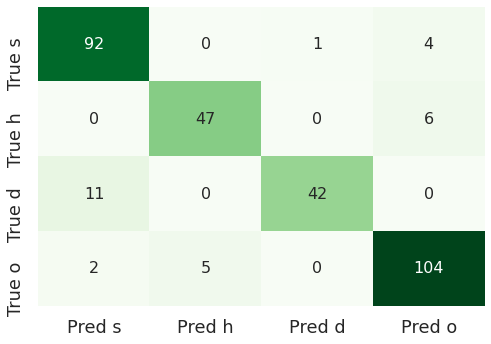

In [40]:
# matrix de confusão do Modelo 1

cf_1 = pd.DataFrame(confusion_matrix(gt, y_pred_modelo_1), columns=['Pred s', 'Pred h', 'Pred d', 'Pred o'], 
             index=['True s', 'True h', 'True d', 'True o'])

sns.set(font_scale=1.6)

sns.heatmap(cf_1, annot=True, fmt='', annot_kws={'fontsize': 16}, cmap='Greens', cbar=False)

In [41]:
# Testando o modelo 2

modelo_2 = RandomForestClassifier(n_estimators=750, criterion='entropy', random_state=37, n_jobs=-1)
modelo_2.fit(X,y)
y_pred_modelo_2 = modelo_2.predict(X_teste)
print("A acurácia do modelo otimizado é:", round(accuracy_score(gt, y_pred_modelo_2), 5) * 100, "%")
print("O índice cohen-kappa do modelo default é:", round(cohen_kappa_score(gt, y_pred_modelo_2), 3))

A acurácia do modelo otimizado é: 91.083 %
O índice cohen-kappa do modelo default é: 0.876


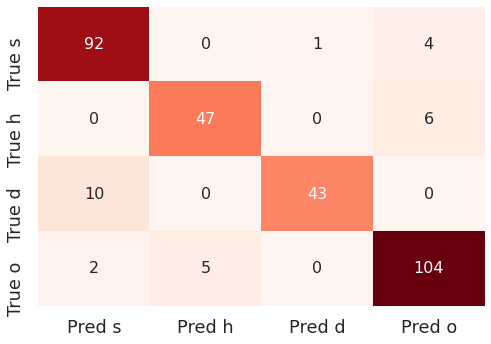

In [47]:
# Matriz de confusão do Modelo 2

cf_2 = pd.DataFrame(confusion_matrix(gt, y_pred_modelo_2), columns=['Pred s', 'Pred h', 'Pred d', 'Pred o'], 
             index=['True s', 'True h', 'True d', 'True o'])

sns.set(font_scale=1.6)

sns.heatmap(cf_2, annot=True, fmt='', annot_kws={'fontsize': 16}, cmap='Reds', cbar=False)

In [43]:
# Testando o modelo 3

modelo_3 = RandomForestClassifier(n_estimators=750, criterion='entropy', random_state=42, n_jobs=-1)
modelo_3.fit(X,y)
y_pred_modelo_3 = modelo_3.predict(X_teste)
print("A acurácia do modelo otimizado é:", round(accuracy_score(gt, y_pred_modelo_3), 5) * 100, "%")
print("O índice cohen-kappa do modelo default é:", round(cohen_kappa_score(gt, y_pred_modelo_3), 3))

A acurácia do modelo otimizado é: 90.446 %
O índice cohen-kappa do modelo default é: 0.867


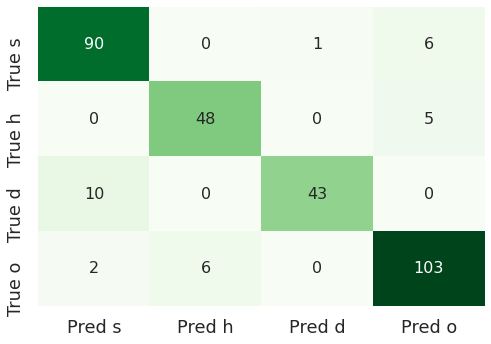

In [48]:
# Matriz de confusão do Modelo 3

cf_3 = pd.DataFrame(confusion_matrix(gt, y_pred_modelo_3), columns=['Pred s', 'Pred h', 'Pred d', 'Pred o'], 
             index=['True s', 'True h', 'True d', 'True o'])

sns.set(font_scale=1.6)

sns.heatmap(cf_3, annot=True, fmt='', annot_kws={'fontsize': 16}, cmap='Greens', cbar=False)

# 4. Conclusões

Neste projeto, executei uma série de procedimentos para a construção de um modelo de  aprendizado de máquina capaz de prever múltiplas classes temáticas a partir de dados estruturados derivados de imagens de satélite e interpolação espacial.

O modelo que apresentou a melhor performance obteve uma acurácia de 91,08% e índice kappa de 0,876, sendo então escolhido como o modelo final otimizado para o problema.

Com o modelo final devidamente ajustado, realizei o treinamento e fiz previsões nos dados de teste. Comparando com os resultados do modelo padrão, têm-se: 

*   **Melhoria de 1,58 pontos percentuais na acurácia**
*   **Melhoria de 2,51 pontos percentuais no índice kappa**

Além disso, pelas matrizes de confusão pode-se observar que, em geral, o modelo otimizado aumentou a taxa de acerto para todas as classes, exceto a classe '`h`'. Consequentemente, houve uma diminuição de casos do tipo "falso-positivo" em todas as classes, exceto a classe '`o`'.

Dadas as características dos conjuntos de dados, que apresentam atributos com dados medidos direta e indiretamente e classes desbalanceadas, as performances de ambos os modelos foram excelentes. 

**Por fim, com a pontuação alcançada com o modelo otimizado, ficaria empatado com o terceiro lugar geral no ranking da competição.**